# Import des librairies et de la base 

In [1]:
import pandas as pd
from sklearn.ensemble import RandomForestRegressor
from sklearn.metrics import mean_squared_error
from sklearn.preprocessing import StandardScaler
from sklearn.compose import ColumnTransformer
from sklearn.pipeline import Pipeline
from sklearn.impute import SimpleImputer
from sklearn.model_selection import train_test_split, GridSearchCV
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pyplot as plt
import seaborn as sns
from sklearn.ensemble import AdaBoostRegressor
from sklearn.tree import DecisionTreeRegressor

In [2]:
R = input("On est en local ? (Y)")
R = R.upper()

if R == 'Y':
    Path = 'G:/Mon Drive/Colab Notebooks/Projet S3/'
else:
    from google.colab import drive
    drive.mount('/content/drive')
    Path = '/content/drive/MyDrive/Colab Notebooks/Projet S3/'

In [3]:
Pathdata = Path + 'train.csv'
data = pd.read_csv(Pathdata)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data['YearBuilt'] = data['YearBuilt'].astype('object')
data['YearRemodAdd'] = data['YearRemodAdd'].astype('object')
data['MoSold'] = data['MoSold'].astype('object')
data['YrSold'] = data['YrSold'].astype('object')
data['GarageYrBlt'] = data['GarageYrBlt'].astype('object')

# Ajustement de la base
data['Alley'] = data['Alley'].fillna('No alley')
data['BsmtQual'] = data['BsmtQual'].fillna('No Basement')
data['BsmtCond'] = data['BsmtCond'].fillna('No Basement')
data['BsmtExposure'] = data['BsmtExposure'].fillna('No Basement')
data['BsmtFinType1'] = data['BsmtFinType1'].fillna('No Basement')
data['BsmtFinType2'] = data['BsmtFinType2'].fillna('No Basement')
data['FireplaceQu'] = data['FireplaceQu'].fillna('No Fireplace')
data['GarageType'] = data['GarageType'].fillna('No Garage')
data['GarageFinish'] = data['GarageFinish'].fillna('No Garage')
data['GarageQual'] = data['GarageQual'].fillna('No Garage')
data['GarageCond'] = data['GarageCond'].fillna('No Garage')
data['GarageYrBlt'] = data['GarageYrBlt'].fillna('No Garage')
data['PoolQC'] = data['PoolQC'].fillna('No Pool')
data['Fence'] = data['Fence'].fillna('No Fence')
data['MiscFeature'] = data['MiscFeature'].fillna('No feature')
data['LotFrontage'] = data['LotFrontage'].fillna(0)
data['MasVnrType'] = data['MasVnrType'].fillna('No veneer')

# Affiche la taille de la base
print(data.shape)

# drop les lignes avec des valeurs manquantes
data = data.dropna()

# Affiche la taille de la base
print(data.shape)

data.dtypes

(1460, 81)
(1451, 81)


Id                 int64
MSSubClass         int64
MSZoning          object
LotFrontage      float64
LotArea            int64
                  ...   
MoSold            object
YrSold            object
SaleType          object
SaleCondition     object
SalePrice          int64
Length: 81, dtype: object

In [4]:
Pathdata2 = Path + 'test.csv'
data2 = pd.read_csv(Pathdata2)

# Transforme certaines colonnes en catégorie : YearBuilt, YearRemodAdd, MoSold, YrSold, GarageYrBlt
data2['YearBuilt'] = data2['YearBuilt'].astype('object')
data2['YearRemodAdd'] = data2['YearRemodAdd'].astype('object')
data2['MoSold'] = data2['MoSold'].astype('object')
data2['YrSold'] = data2['YrSold'].astype('object')
data2['GarageYrBlt'] = data2['GarageYrBlt'].astype('object')

# Ajustement de la base
data2['Alley'] = data2['Alley'].fillna('No alley')
data2['BsmtQual'] = data2['BsmtQual'].fillna('No Basement')
data2['BsmtCond'] = data2['BsmtCond'].fillna('No Basement')
data2['BsmtExposure'] = data2['BsmtExposure'].fillna('No Basement')
data2['BsmtFinType1'] = data2['BsmtFinType1'].fillna('No Basement')
data2['BsmtFinType2'] = data2['BsmtFinType2'].fillna('No Basement')
data2['FireplaceQu'] = data2['FireplaceQu'].fillna('No Fireplace')
data2['GarageType'] = data2['GarageType'].fillna('No Garage')
data2['GarageFinish'] = data2['GarageFinish'].fillna('No Garage')
data2['GarageQual'] = data2['GarageQual'].fillna('No Garage')
data2['GarageCond'] = data2['GarageCond'].fillna('No Garage')
data2['GarageYrBlt'] = data2['GarageYrBlt'].fillna('No Garage')
data2['PoolQC'] = data2['PoolQC'].fillna('No Pool')
data2['Fence'] = data2['Fence'].fillna('No Fence')
data2['MiscFeature'] = data2['MiscFeature'].fillna('No feature')
data2['LotFrontage'] = data2['LotFrontage'].fillna(0)
data2['MasVnrType'] = data2['MasVnrType'].fillna('No veneer')

print(data2.shape)


(1459, 80)


# Random forest

## Random classique

In [5]:
# Séparer les variables indépendantes et la variable dépendante (prix de la maison)
X = data.drop('SalePrice', axis=1)  # Remplacer 'HousePrice' par le nom de votre colonne cible
y = data['SalePrice']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélectionner les colonnes numériques et catégorielles
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Créer des pipelines pour le prétraitement
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Prétraitement avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Créer un pipeline qui combine le prétraitement avec le modèle
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=100, random_state=42))])

# Entraîner le modèle
rf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 501014940.03843296


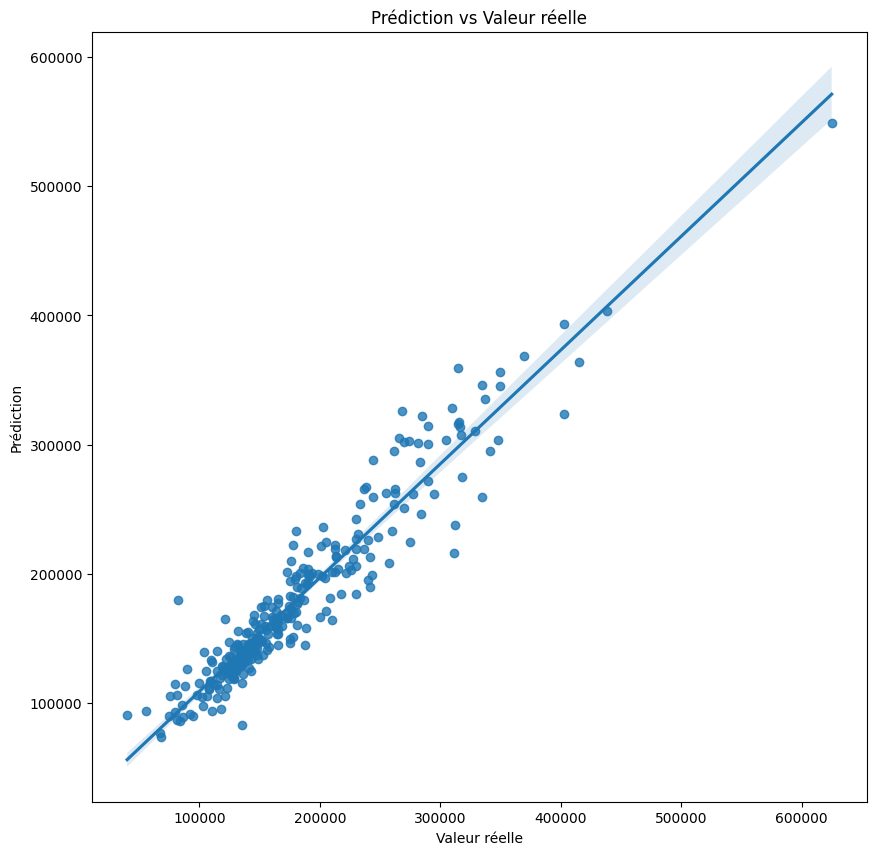

In [6]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

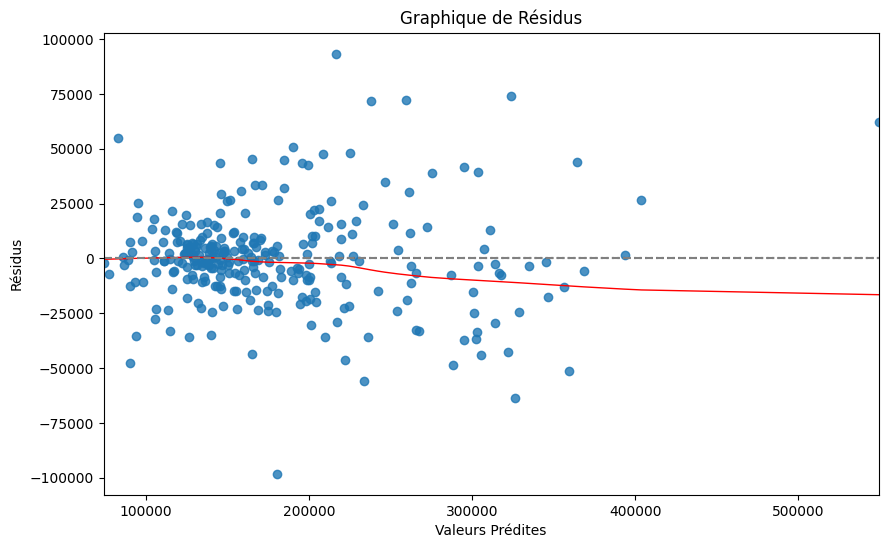

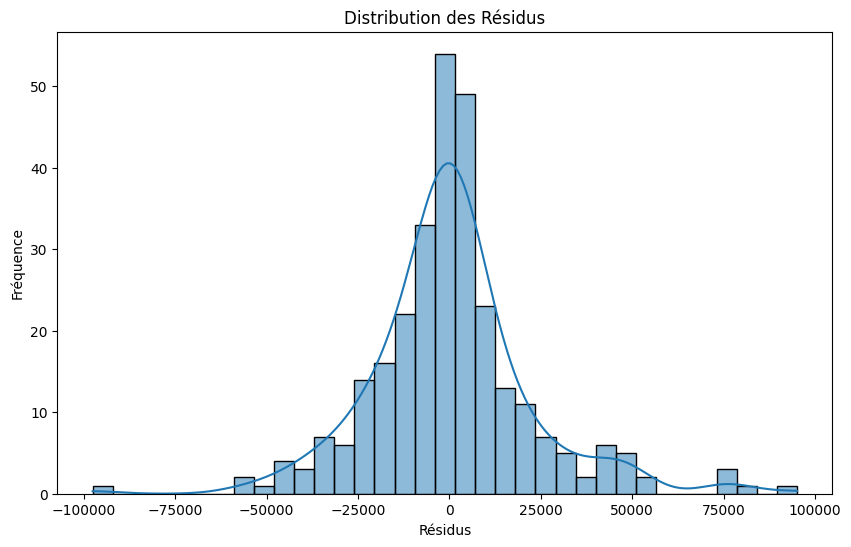

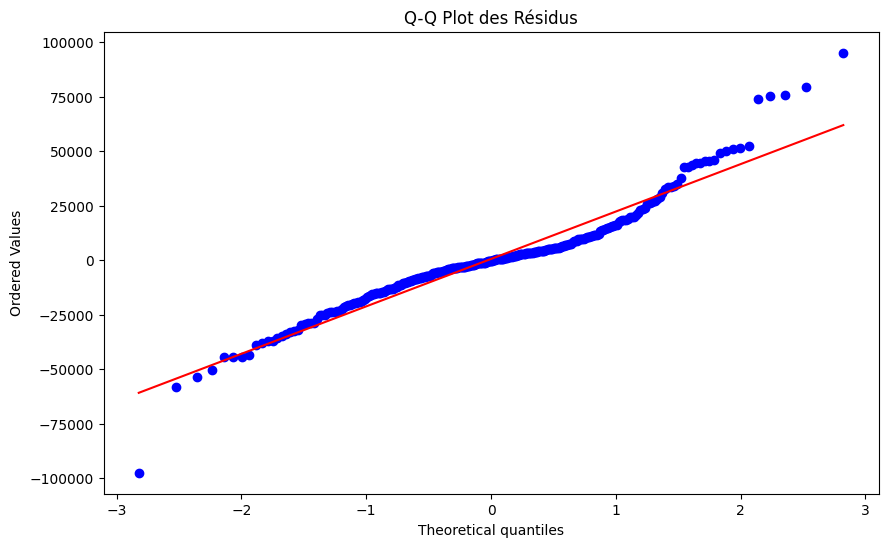

In [7]:
# Supposons que y_test sont vos valeurs réelles et y_pred sont les prédictions de votre modèle
residuals = y_test - y_pred

# Graphique de résidus
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Graphique de Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()


In [8]:
# Application du modèle ssur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Prédire sur l'ensemble de test
y_pred = rf.predict(data2)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred})

submission.to_csv(Path + 'submission Random Forest.csv', index=False)


## Random forest avec modification des paramtres

In [9]:
# Séparer les variables indépendantes et la variable dépendante (prix de la maison)
X = data.drop('SalePrice', axis=1)  # Remplacer 'SalePrice' par le nom de votre colonne cible
y = data['SalePrice']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélectionner les colonnes numériques et catégorielles
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Créer des pipelines pour le prétraitement
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Prétraitement avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Créer un pipeline qui combine le prétraitement avec le modèle Random Forest
rf_pipeline = Pipeline(steps=[('preprocessor', preprocessor),
                              ('regressor', RandomForestRegressor(random_state=42))])

# Définir la grille de paramètres pour GridSearchCV
param_grid = {
    'regressor__n_estimators': [50, 100, 200],
    'regressor__max_depth': [None, 10, 20, 30]
}

# Créer l'objet GridSearchCV
grid_search = GridSearchCV(rf_pipeline, param_grid, cv=5, scoring='neg_mean_squared_error', n_jobs=-1)

# Entraîner le modèle avec GridSearchCV pour trouver les meilleurs paramètres
grid_search.fit(X_train, y_train)

# Afficher les meilleurs paramètres et le meilleur score trouvé par GridSearchCV
print("Meilleurs paramètres: ", grid_search.best_params_)
print("Meilleur score CV (MSE négatif): ", -grid_search.best_score_)

# Utiliser le meilleur modèle trouvé pour prédire sur l'ensemble de test
best_model = grid_search.best_estimator_
y_pred = best_model.predict(X_test)

# Évaluer le meilleur modèle sur l'ensemble de test
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error sur le jeu de test: {mse}')


Meilleurs paramètres:  {'regressor__max_depth': 20, 'regressor__n_estimators': 200}
Meilleur score CV (MSE négatif):  1182045901.6667144
Mean Squared Error sur le jeu de test: 490691502.8083209


In [10]:
# Séparer les variables indépendantes et la variable dépendante (prix de la maison)
X = data.drop('SalePrice', axis=1)  # Remplacer 'HousePrice' par le nom de votre colonne cible
y = data['SalePrice']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélectionner les colonnes numériques et catégorielles
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Créer des pipelines pour le prétraitement
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Prétraitement avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Créer un pipeline qui combine le prétraitement avec le modèle
rf = Pipeline(steps=[('preprocessor', preprocessor),
                      ('regressor', RandomForestRegressor(n_estimators=200, random_state=42, max_depth=20))])

# Entraîner le modèle
rf.fit(X_train, y_train)

# Prédire sur l'ensemble de test
y_pred = rf.predict(X_test)

# Évaluer le modèle
mse = mean_squared_error(y_test, y_pred)
print(f'Mean Squared Error: {mse}')

Mean Squared Error: 490691502.8083209


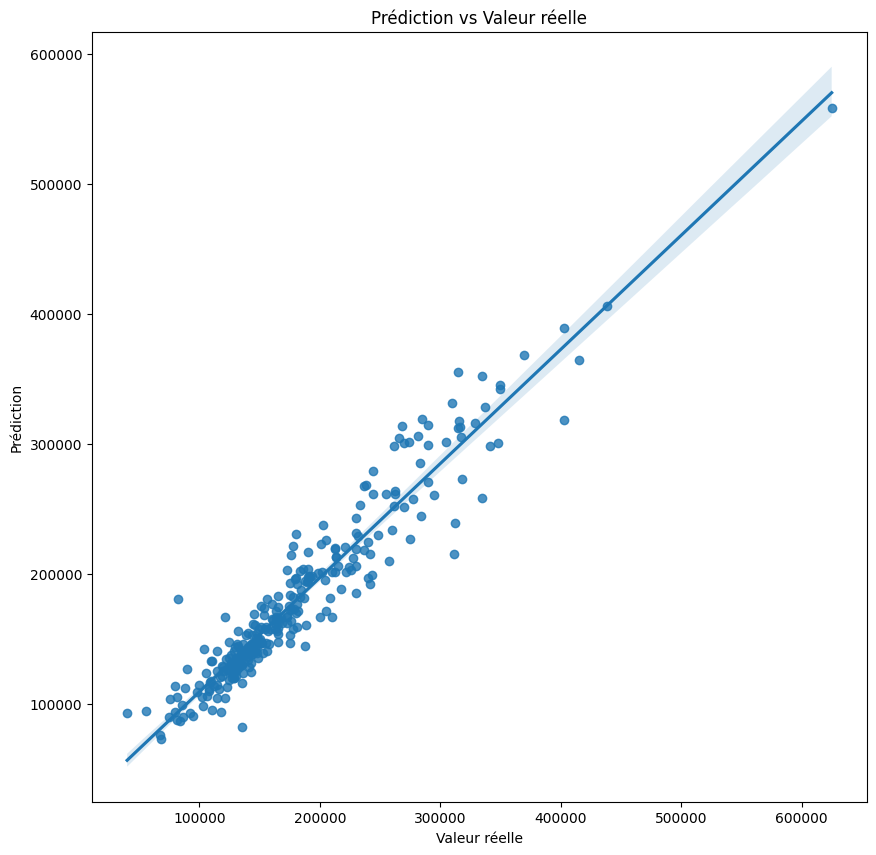

In [11]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

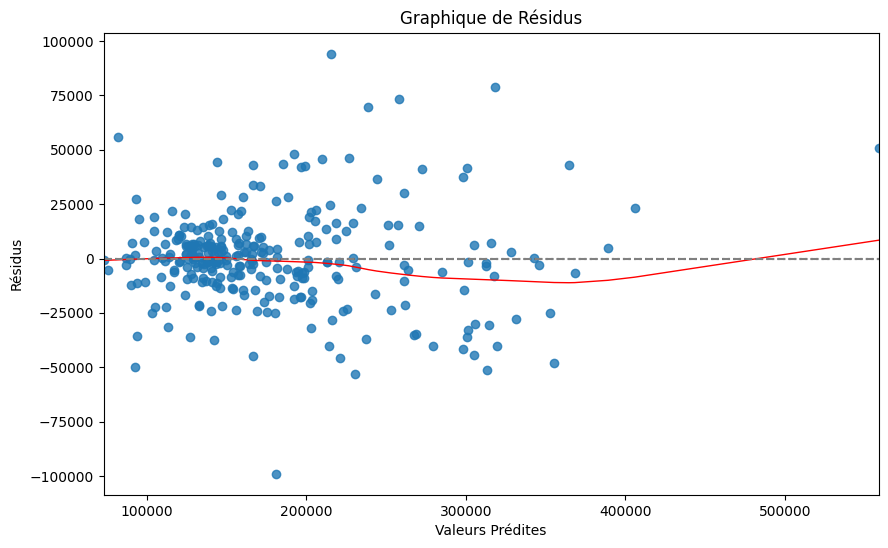

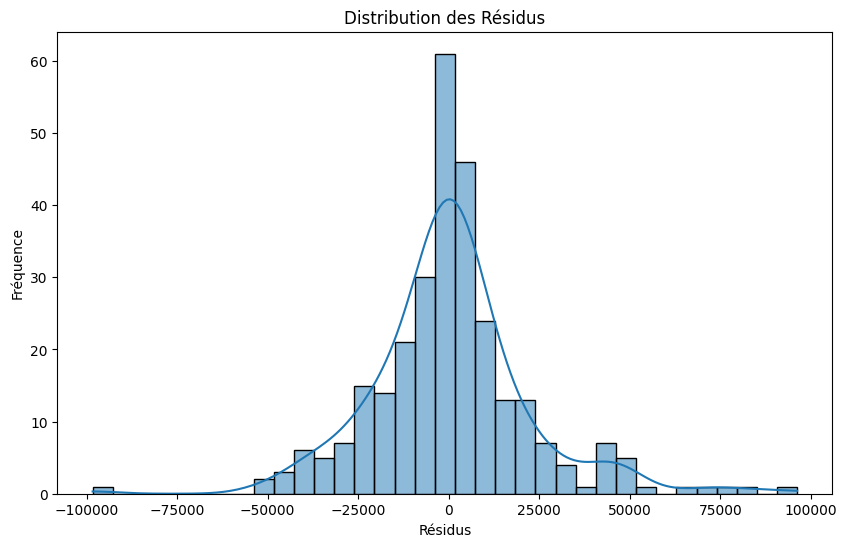

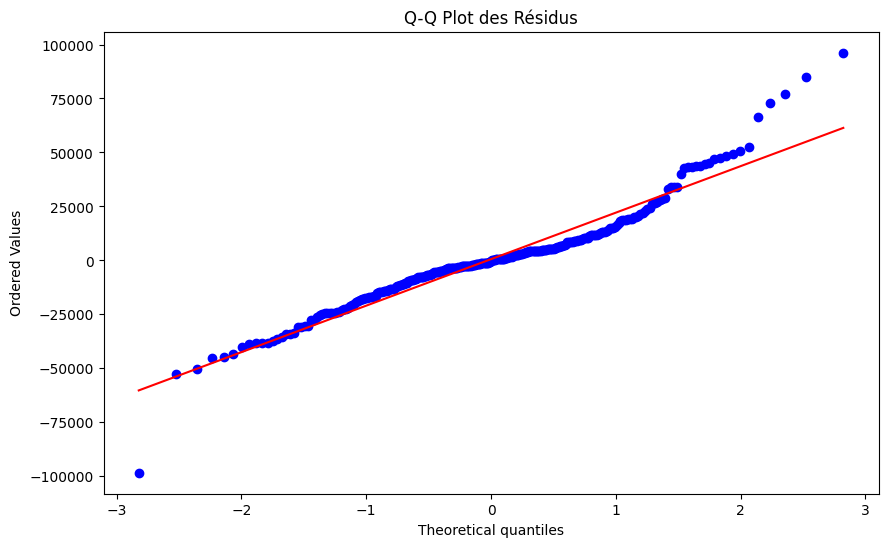

In [12]:
# Supposons que y_test sont vos valeurs réelles et y_pred sont les prédictions de votre modèle
residuals = y_test - y_pred

# Graphique de résidus
plt.figure(figsize=(10, 6))
sns.residplot(x=y_pred, y=residuals, lowess=True, line_kws={'color': 'red', 'lw': 1})
plt.title('Graphique de Résidus')
plt.xlabel('Valeurs Prédites')
plt.ylabel('Résidus')
plt.axhline(y=0, color='grey', linestyle='--')
plt.show()

# Histogramme des résidus
plt.figure(figsize=(10, 6))
sns.histplot(residuals, kde=True)
plt.title('Distribution des Résidus')
plt.xlabel('Résidus')
plt.ylabel('Fréquence')
plt.show()

# Q-Q plot des résidus
import scipy.stats as stats

plt.figure(figsize=(10, 6))
stats.probplot(residuals, dist="norm", plot=plt)
plt.title('Q-Q Plot des Résidus')
plt.show()


In [13]:
# Application du modèle ssur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Prédire sur l'ensemble de test
y_pred = rf.predict(data2)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred})

submission.to_csv(Path + 'submission Random Forest Param.csv', index=False)


# Adaboost

In [14]:
# Séparer les variables indépendantes et la variable dépendante (prix de la maison)
X = data.drop('SalePrice', axis=1)  # Assurez-vous que 'SalePrice' est le nom de votre variable cible
y = data['SalePrice']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélectionner les colonnes numériques et catégorielles
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Créer des pipelines pour le prétraitement
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Prétraitement avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Choisir un estimateur de base pour AdaBoost, par exemple un DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=5)

# Créer un pipeline qui combine le prétraitement avec le modèle AdaBoost
ada_boost = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', AdaBoostRegressor(base_estimator=base_estimator,
                                                            n_estimators=50,
                                                            random_state=42))])

# Entraîner le modèle AdaBoost
ada_boost.fit(X_train, y_train)

# Prédire sur l'ensemble de test avec AdaBoost
y_pred2 = ada_boost.predict(X_test)

# Évaluer le modèle AdaBoost
mse = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error: {mse}')


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 598203151.9236875


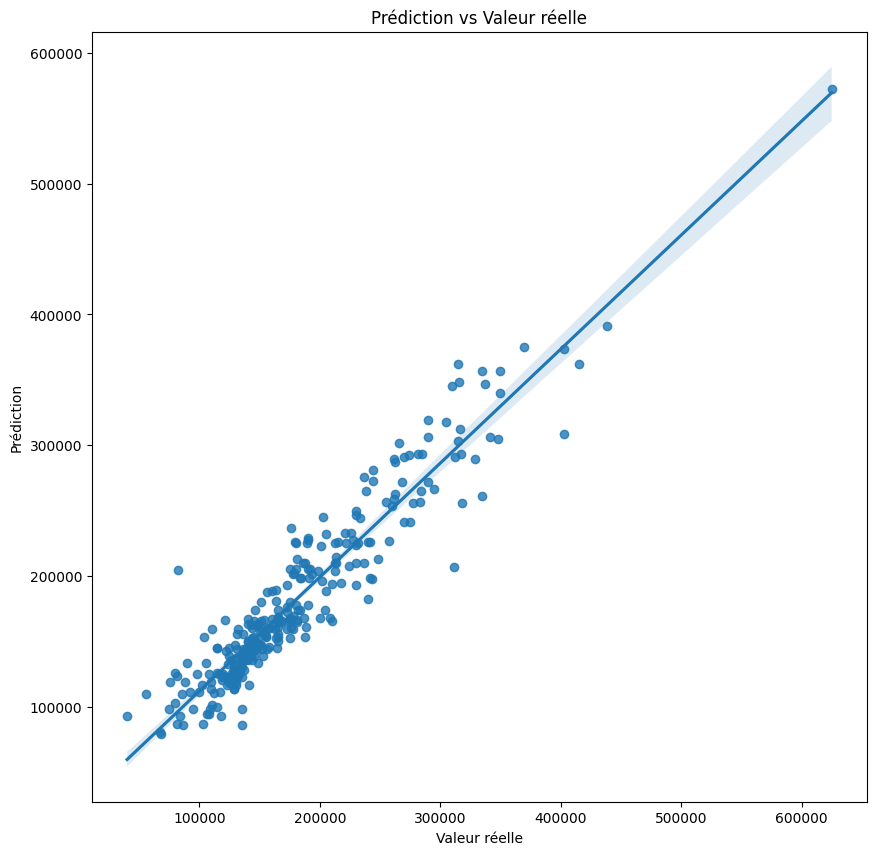

In [15]:
# Graphique entre la prédiction et la valeur réelle

# Taille du graphique
plt.figure(figsize=(10, 10))
sns.regplot(x=y_test, y=y_pred2)
plt.xlabel('Valeur réelle')
plt.ylabel('Prédiction')
plt.title('Prédiction vs Valeur réelle')
plt.show()

In [22]:
# Application du modèle ssur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Prédire sur l'ensemble de test
y_pred2 = ada_boost.predict(data2)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred2})

submission.to_csv(Path + 'submission Adaboost.csv', index=False)


In [17]:
# Séparer les variables indépendantes et la variable dépendante (prix de la maison)
X = data.drop('SalePrice', axis=1)  # Assurez-vous que 'SalePrice' est le nom de votre variable cible
y = data['SalePrice']

# Séparer les données en ensembles d'entraînement et de test
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.2, random_state=42)

# Sélectionner les colonnes numériques et catégorielles
numeric_features = X_train.select_dtypes(include=['int64', 'float64']).columns
categorical_features = X_train.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    X_train[col] = X_train[col].astype(str)
    X_test[col] = X_test[col].astype(str)

# Créer des pipelines pour le prétraitement
numeric_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='median')),
    ('scaler', StandardScaler())])

categorical_transformer = Pipeline(steps=[
    ('imputer', SimpleImputer(strategy='constant', fill_value='missing')),
    ('onehot', OneHotEncoder(handle_unknown='ignore'))])

# Prétraitement avec ColumnTransformer
preprocessor = ColumnTransformer(
    transformers=[
        ('num', numeric_transformer, numeric_features),
        ('cat', categorical_transformer, categorical_features)])

# Choisir un estimateur de base pour AdaBoost, par exemple un DecisionTreeRegressor
base_estimator = DecisionTreeRegressor(max_depth=20)

# Créer un pipeline qui combine le prétraitement avec le modèle AdaBoost
ada_boost = Pipeline(steps=[('preprocessor', preprocessor),
                            ('regressor', AdaBoostRegressor(base_estimator=base_estimator,
                                                            n_estimators=200,
                                                            random_state=42))])

# Entraîner le modèle AdaBoost
ada_boost.fit(X_train, y_train)

# Prédire sur l'ensemble de test avec AdaBoost
y_pred2 = ada_boost.predict(X_test)

# Évaluer le modèle AdaBoost
mse = mean_squared_error(y_test, y_pred2)
print(f'Mean Squared Error: {mse}')


C:\Users\franc\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\sklearn\ensemble\_base.py:156: FutureWarning: `base_estimator` was renamed to `estimator` in version 1.2 and will be removed in 1.4.
  warnings.warn(


Mean Squared Error: 495026134.1415404


In [18]:
# Application du modèle sur data2
# Sélectionner les colonnes numériques et catégorielles
numeric_features = data2.select_dtypes(include=['int64', 'float64']).columns
categorical_features = data2.select_dtypes(include=['object']).columns

# Convertir les données catégorielles en chaînes de caractères
for col in categorical_features:
    data2[col] = data2[col].astype(str)

# Prédire sur l'ensemble de test
y_pred2 = ada_boost.predict(data2)

# Création du fichier de soumission
submission = pd.DataFrame({'Id': data2['Id'], 'SalePrice': y_pred2})

submission.to_csv(Path + 'submission Adaboost Param.csv', index=False)
